<table>
  <tr>
    <td style="text-align: center;">
      <img src="https://www.ufpi.br/images/ufpi-icone1.png" alt="UFPI Logo" style="width: 100px; height: auto;">
    </td>
    <td style="text-align: left;">
      <h3>Universidade Federal do Piauí - UFPI</h3>
      <h3>Departamento de Computação/CNN</h3>
      <h3>Trabalho da Disciplina de Aprendizado de Máquina</h3>
      <h3>Professor: Vinicius Ponte Machado</h3>
    </td>
  </tr>
</table>

**Alunos**: Marcelo Pontes e Marcelo Rego  
**Objetivo**: realizar estudos de Árvore de Decisão utilizando o banco de dados de diagnóstico de câncer de mama de Wisconsin  
**Repositório**: [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Introdução**

<p style='text-align: justify;'>
O propósito da pesquisa foi criar um modelo para o diagnóstico do câncer de mama, utilizando características nucleares obtidas a partir de imagens digitalizadas por meio de aspiração por agulha fina (FNA, do inglês, Fine Needle Aspirations). O desenvolvimento desse conjunto de dados tinha como objetivo oferecer uma base de dados confiável e padronizada, destinada a apoiar investigações em aprendizado de máquina e análises preditivas na medicina. As informações foram coletadas no Clinical Sciences Center da Universidade de Wisconsin.  As coletas ocorreram durante o início da década de 1990, sendo a primeira publicação relevante sobre os dados apresentada em 1993. O desenvolvimento e refinamento do dataset continuaram até aproximadamente 1995, quando ele foi disponibilizado no UCI Machine Learning Repository, onde continua sendo amplamente utilizado para pesquisas em aprendizado de máquina e análise médica.
</p>

# **Metodologia**
<p style='text-align: justify;'>
O estudo foi conduzido de forma abrangente, revisitando cada etapa várias vezes para avaliar, ajustar e validar as hipóteses propostas. Em cada iteração para efeito de comparação o tamanho do conjunto de testes é o mesmo de 30%, foram realizadas análises cuidadosas para determinar a aceitação ou rejeição das hipóteses:
</p>
<p style='text-align: justify;'>
Após uma análise aprofundada dos dados, formulamos algumas hipóteses e justificativas:
(i) Redução de dimensionalidade: algumas variáveis foram excluídas por apresentarem baixo impacto na predição;
(ii) Modificação dos parâmetros Tamanho da floresta =100 e folhas com 9 samples;

Realizamos diversas rodadas de teste para avaliar as hipóteses propostas, ajustando parâmetros como a proporção do conjunto de teste (variando entre 10% e 40%, em incrementos de 5%) e critérios de avaliação como entropia e índice de Gini. Cada ajuste visava otimizar as métricas de desempenho e determinar a configuração mais eficaz.
</p>

## **Carregar o dataset**

In [ ]:
# conectar o Google Colab no Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# atribuir a uma variável o caminho do arquivo
file_path = '/content/drive/MyDrive/Colab Notebooks/cancer_mama/breast-cancer-wisconsin.csv'

## **Pré-processamento e atribuição de variáveis**

In [3]:
import pandas as pd

# Transformar os dados em um Dataframe
df = pd.read_csv(file_path)
df.drop('Unnamed: 32', axis=1, inplace=True)
# Exibir o DataFrame
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# Carregar o conjunto de dados breast-cancer-wisconsin.csv
# Substitua 'diagnosis' pelo nome real da coluna alvo, se for diferente
df = pd.read_csv(file_path)
df.drop('Unnamed: 32', axis=1, inplace=True)

# Assumindo que a coluna 'diagnosis' é o alvo e as demais são características
X = df.drop(columns=['diagnosis', 'id'], axis=1)

# Converter 'M' para 1 e 'B' para 0
y = df['diagnosis'].map({'M': 1, 'B': 0})

# Treinar uma floresta aleatória no conjunto de dados
model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
model.fit(X, y)

# Calcular a acurácia OOB original
baseline_accuracy = accuracy_score(y, model.oob_decision_function_.argmax(axis=1))

# Função para calcular a importância das variáveis via permutação
importances = {}

for coluna in X.columns:
    # Copiar o conjunto de dados para fazer a permutação
    X_permuted = X.copy()

    # Embaralhar os valores da coluna atual
    X_permuted[coluna] = shuffle(X[coluna].values, random_state=42)

    # Treinar o modelo novamente com a coluna permutada e calcular a nova acurácia OOB
    model_permuted = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
    model_permuted.fit(X_permuted, y)
    permuted_accuracy = accuracy_score(y, model_permuted.oob_decision_function_.argmax(axis=1))

    # A importância da variável é a diferença na acurácia
    importance = baseline_accuracy - permuted_accuracy
    importances[coluna] = importance


importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))
# Exibir a importância das variáveis
for coluna, importance in importances.items():
    print(f"Importância da variável {coluna}: {importance:.4f}")

# Gerar lista de chaves onde o valor associado é maior que 0.0000
chaves_filtradas = [chave for chave, valor in importances.items() if valor <= 0.0000]

print(chaves_filtradas)

Importância da variável texture_mean: 0.0035
Importância da variável perimeter_mean: 0.0035
Importância da variável radius_mean: 0.0018
Importância da variável compactness_mean: 0.0018
Importância da variável concavity_mean: 0.0018
Importância da variável compactness_se: 0.0018
Importância da variável radius_worst: 0.0018
Importância da variável texture_worst: 0.0018
Importância da variável concavity_worst: 0.0018
Importância da variável smoothness_mean: 0.0000
Importância da variável concave points_mean: 0.0000
Importância da variável symmetry_mean: 0.0000
Importância da variável texture_se: 0.0000
Importância da variável concavity_se: 0.0000
Importância da variável fractal_dimension_se: 0.0000
Importância da variável area_worst: 0.0000
Importância da variável fractal_dimension_worst: 0.0000
Importância da variável area_mean: -0.0018
Importância da variável fractal_dimension_mean: -0.0018
Importância da variável perimeter_se: -0.0018
Importância da variável concave points_se: -0.0018


In [4]:
# Carregar o conjunto de dados breast-cancer-wisconsin.csv
# Substitua 'diagnosis' pelo nome real da coluna alvo, se for diferente
df = pd.read_csv(file_path)
df.drop('Unnamed: 32', axis=1, inplace=True)

# Assumindo que a coluna 'diagnosis' é o alvo e as demais são características
X = df.drop(columns=['diagnosis', 'id'], axis=1)

y = df['diagnosis']

In [11]:
# Separar as variáveis X e y
#X = df.drop(['diagnosis', 'id'], axis=1)
#X = df.drop(['diagnosis', 'id','perimeter_mean','area_mean','perimeter_worst','area_worst'], axis=1)
X = df.drop(['diagnosis','id','smoothness_mean', 'concave points_mean', 'symmetry_mean', 'texture_se', 'concavity_se', 'fractal_dimension_se', 'area_worst', 'fractal_dimension_worst', 'area_mean', 'fractal_dimension_mean', 'perimeter_se', 'concave points_se', 'compactness_worst', 'symmetry_worst', 'radius_se', 'area_se', 'smoothness_se', 'symmetry_se', 'smoothness_worst', 'concave points_worst', 'perimeter_worst'], axis=1)
y = df['diagnosis']


## Aplicar o Modelo de Machine Learning - Random Forest

### Dividir o conjunto de dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ne = 200 # n_estimators

# Definindo o algoritmo
arvores = RandomForestClassifier(n_estimators=ne, random_state=42, n_jobs=-1)

# Treinando o algoritmo
inicio = time.time()
arvores.fit(X_train, y_train)
fim = time.time()

# Fazendo previsões
previsoes = arvores.predict(X_test)

# Calculando a acurácia
acuracia = accuracy_score(y_test, previsoes)

# Mostrando os resultados
print(f'Acurácia do modelo com {ne} árvores: {acuracia}')
print('Tempo de treino do modelo {ne}:', fim - inicio)

Acurácia do modelo com 200 árvores: 0.9707602339181286
Tempo de treino do modelo {ne}: 0.4757199287414551


n_estimators: 100, min_samples_leaf: 2, Acurácia: 0.9708, Tempo: 0.28s
n_estimators: 100, min_samples_leaf: 3, Acurácia: 0.9708, Tempo: 0.25s
n_estimators: 100, min_samples_leaf: 4, Acurácia: 0.9766, Tempo: 0.26s
n_estimators: 100, min_samples_leaf: 5, Acurácia: 0.9708, Tempo: 0.27s
n_estimators: 100, min_samples_leaf: 6, Acurácia: 0.9708, Tempo: 0.24s
n_estimators: 100, min_samples_leaf: 7, Acurácia: 0.9766, Tempo: 0.24s
n_estimators: 100, min_samples_leaf: 8, Acurácia: 0.9766, Tempo: 0.26s
n_estimators: 100, min_samples_leaf: 9, Acurácia: 0.9766, Tempo: 0.25s
n_estimators: 100, min_samples_leaf: 10, Acurácia: 0.9766, Tempo: 0.24s
n_estimators: 150, min_samples_leaf: 2, Acurácia: 0.9708, Tempo: 0.37s
n_estimators: 150, min_samples_leaf: 3, Acurácia: 0.9708, Tempo: 0.38s
n_estimators: 150, min_samples_leaf: 4, Acurácia: 0.9708, Tempo: 0.34s
n_estimators: 150, min_samples_leaf: 5, Acurácia: 0.9708, Tempo: 0.38s
n_estimators: 150, min_samples_leaf: 6, Acurácia: 0.9708, Tempo: 0.36s
n_est

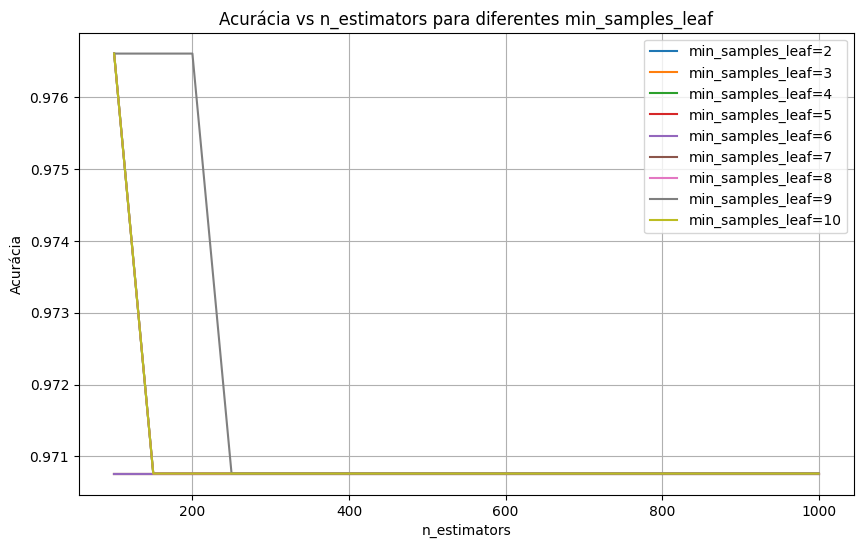

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Variáveis para armazenar os resultados
n_estimators_range = range(100, 1050, 50)
min_samples_leaf_range = range(2, 11)
results = []

# Loop para variar os parâmetros
for ne in n_estimators_range:
    for min_samples_leaf in min_samples_leaf_range:
        # Definindo o algoritmo
        arvores = RandomForestClassifier(n_estimators=ne, min_samples_leaf=min_samples_leaf, random_state=42, n_jobs=-1)

        # Treinando o algoritmo
        inicio = time.time()
        arvores.fit(X_train, y_train)
        fim = time.time()

        # Fazendo previsões
        previsoes = arvores.predict(X_test)

        # Calculando a acurácia
        acuracia = accuracy_score(y_test, previsoes)

        # Guardando os resultados
        results.append((ne, min_samples_leaf, acuracia))
        print(f'n_estimators: {ne}, min_samples_leaf: {min_samples_leaf}, Acurácia: {acuracia:.4f}, Tempo: {fim - inicio:.2f}s')

# Convertendo resultados para matriz para facilitar o plot
accuracies = np.array([[r[2] for r in results if r[0] == ne] for ne in n_estimators_range])

# Plotando o gráfico
plt.figure(figsize=(10, 6))
for i, min_samples_leaf in enumerate(min_samples_leaf_range):
    plt.plot(n_estimators_range, accuracies[:, i], label=f'min_samples_leaf={min_samples_leaf}')

plt.xlabel('n_estimators')
plt.ylabel('Acurácia')
plt.title('Acurácia vs n_estimators para diferentes min_samples_leaf')
plt.legend()
plt.grid(True)
plt.show()

max_features: sqrt, n_estimators: 100, min_samples_leaf: 2, Acurácia: 0.9708, Tempo: 0.26s
max_features: sqrt, n_estimators: 100, min_samples_leaf: 3, Acurácia: 0.9708, Tempo: 0.23s
max_features: sqrt, n_estimators: 100, min_samples_leaf: 4, Acurácia: 0.9766, Tempo: 0.27s
max_features: sqrt, n_estimators: 100, min_samples_leaf: 5, Acurácia: 0.9708, Tempo: 0.24s
max_features: sqrt, n_estimators: 100, min_samples_leaf: 6, Acurácia: 0.9708, Tempo: 0.25s
max_features: sqrt, n_estimators: 100, min_samples_leaf: 7, Acurácia: 0.9766, Tempo: 0.23s
max_features: sqrt, n_estimators: 100, min_samples_leaf: 8, Acurácia: 0.9766, Tempo: 0.24s
max_features: sqrt, n_estimators: 100, min_samples_leaf: 9, Acurácia: 0.9766, Tempo: 0.24s
max_features: sqrt, n_estimators: 100, min_samples_leaf: 10, Acurácia: 0.9766, Tempo: 0.27s
max_features: sqrt, n_estimators: 150, min_samples_leaf: 2, Acurácia: 0.9708, Tempo: 0.36s
max_features: sqrt, n_estimators: 150, min_samples_leaf: 3, Acurácia: 0.9708, Tempo: 0.36

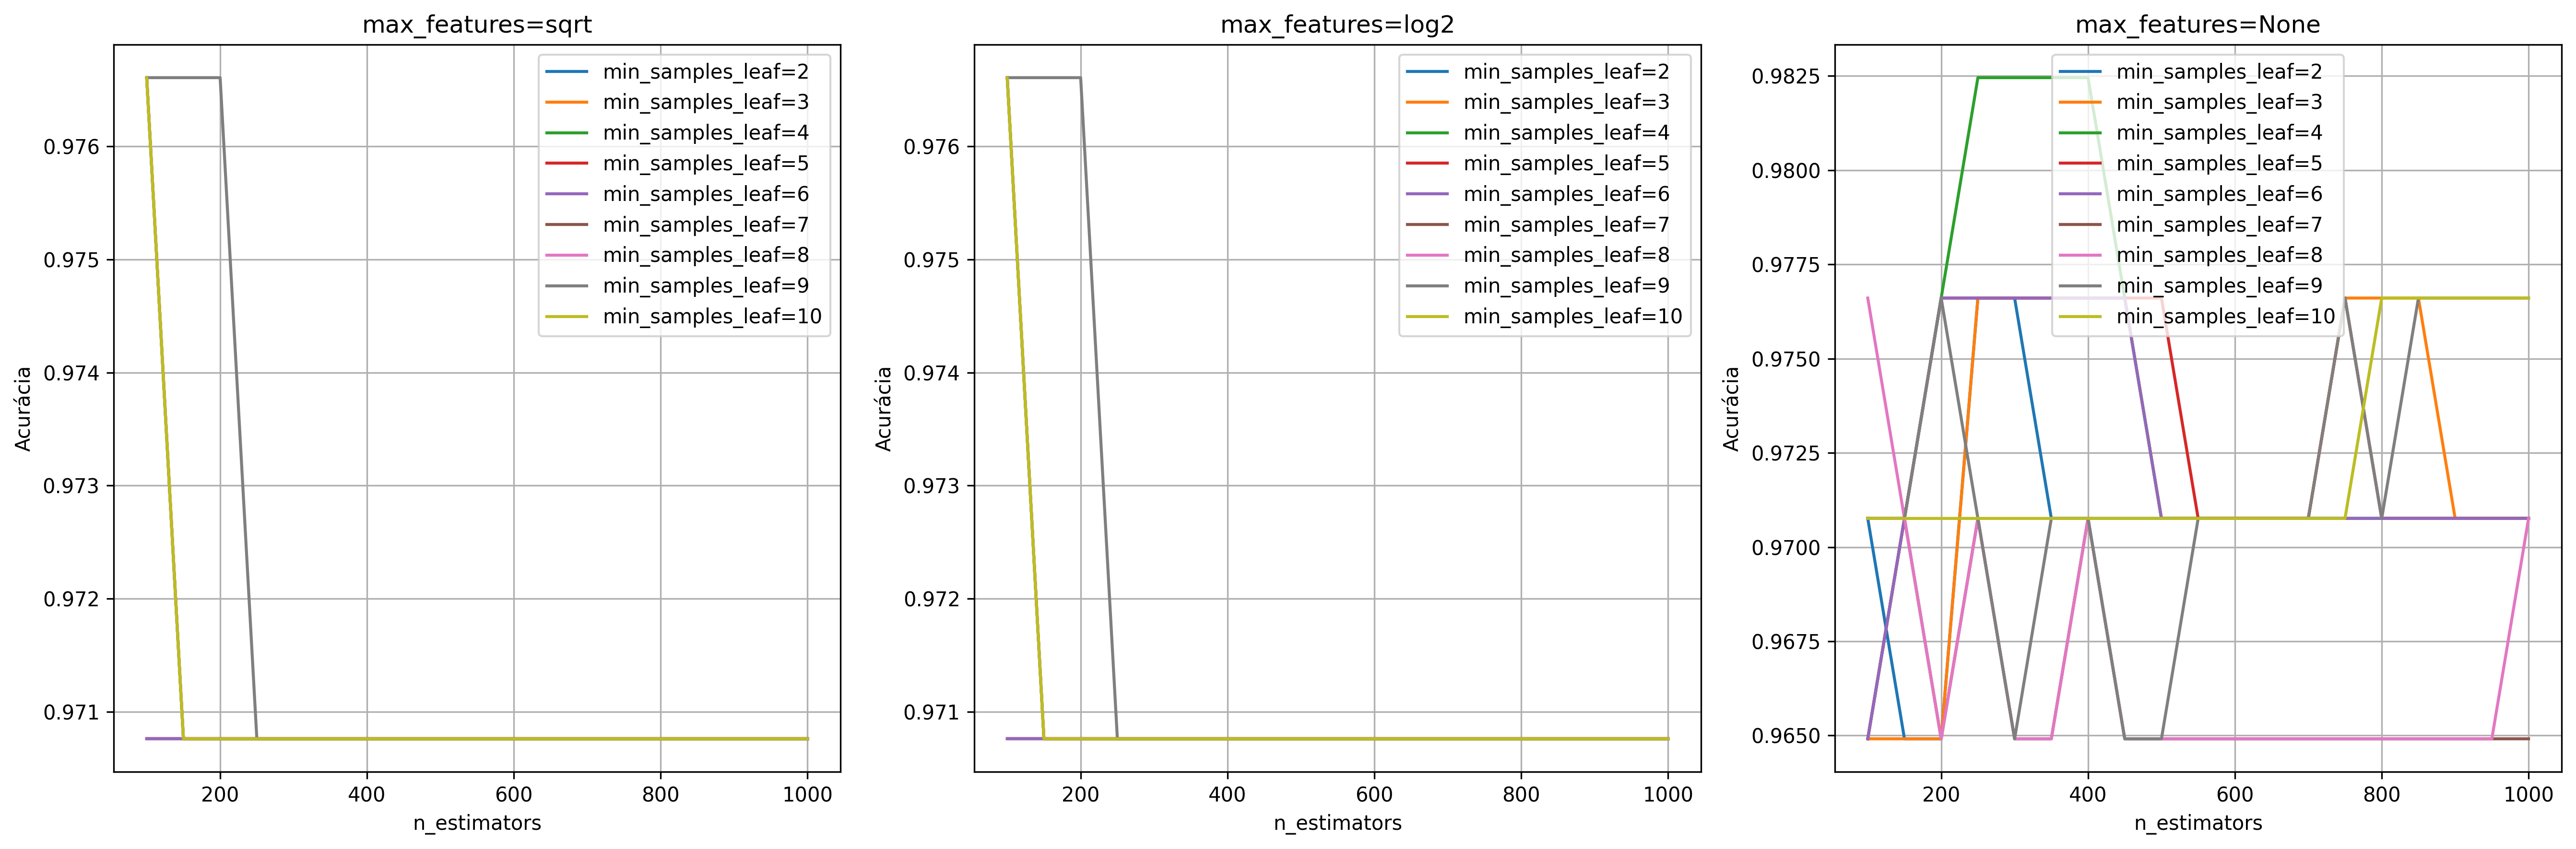

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Variáveis para armazenar os resultados
n_estimators_range = range(100, 1050, 50)
min_samples_leaf_range = range(2, 11)
max_features_options = ['sqrt', 'log2', None]  # 'auto' é equivalente a 'sqrt' no RandomForestClassifier

# Para armazenar os resultados de cada configuração de max_features
results = {mf: [] for mf in max_features_options}

# Loop para variar os parâmetros
for max_features in max_features_options:
    for ne in n_estimators_range:
        for min_samples_leaf in min_samples_leaf_range:
            # Definindo o algoritmo
            arvores = RandomForestClassifier(
                n_estimators=ne,
                min_samples_leaf=min_samples_leaf,
                max_features=max_features,
                random_state=42,
                n_jobs=-1
            )

            # Treinando o algoritmo
            inicio = time.time()
            arvores.fit(X_train, y_train)
            fim = time.time()

            # Fazendo previsões
            previsoes = arvores.predict(X_test)

            # Calculando a acurácia
            acuracia = accuracy_score(y_test, previsoes)

            # Guardando os resultados
            results[max_features].append((ne, min_samples_leaf, acuracia))
            print(f'max_features: {max_features}, n_estimators: {ne}, min_samples_leaf: {min_samples_leaf}, Acurácia: {acuracia:.4f}, Tempo: {fim - inicio:.2f}s')


plt.figure(figsize=(18, 6), dpi=300)

for i, max_features in enumerate(max_features_options):
    plt.subplot(1, 3, i + 1)
    accuracies = np.array([[r[2] for r in results[max_features] if r[0] == ne] for ne in n_estimators_range])

    for j, min_samples_leaf in enumerate(min_samples_leaf_range):
        plt.plot(n_estimators_range, accuracies[:, j], label=f'min_samples_leaf={min_samples_leaf}')

    plt.xlabel('n_estimators')
    plt.ylabel('Acurácia')
    plt.title(f'max_features={max_features}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


# Resultados
Aqui estão os resultados...

Acurácia do modelo com 100 árvores: 0.9766081871345029
Tempo de treino do modelo 100: 0.26623034477233887


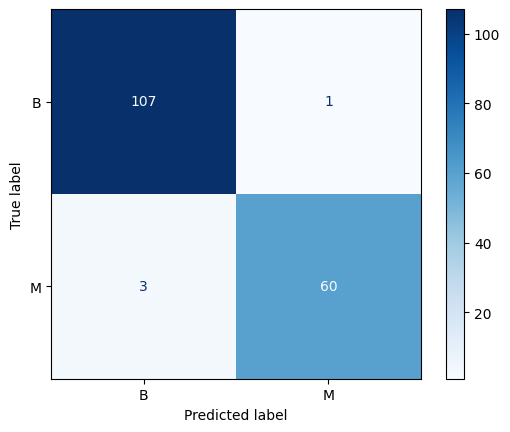

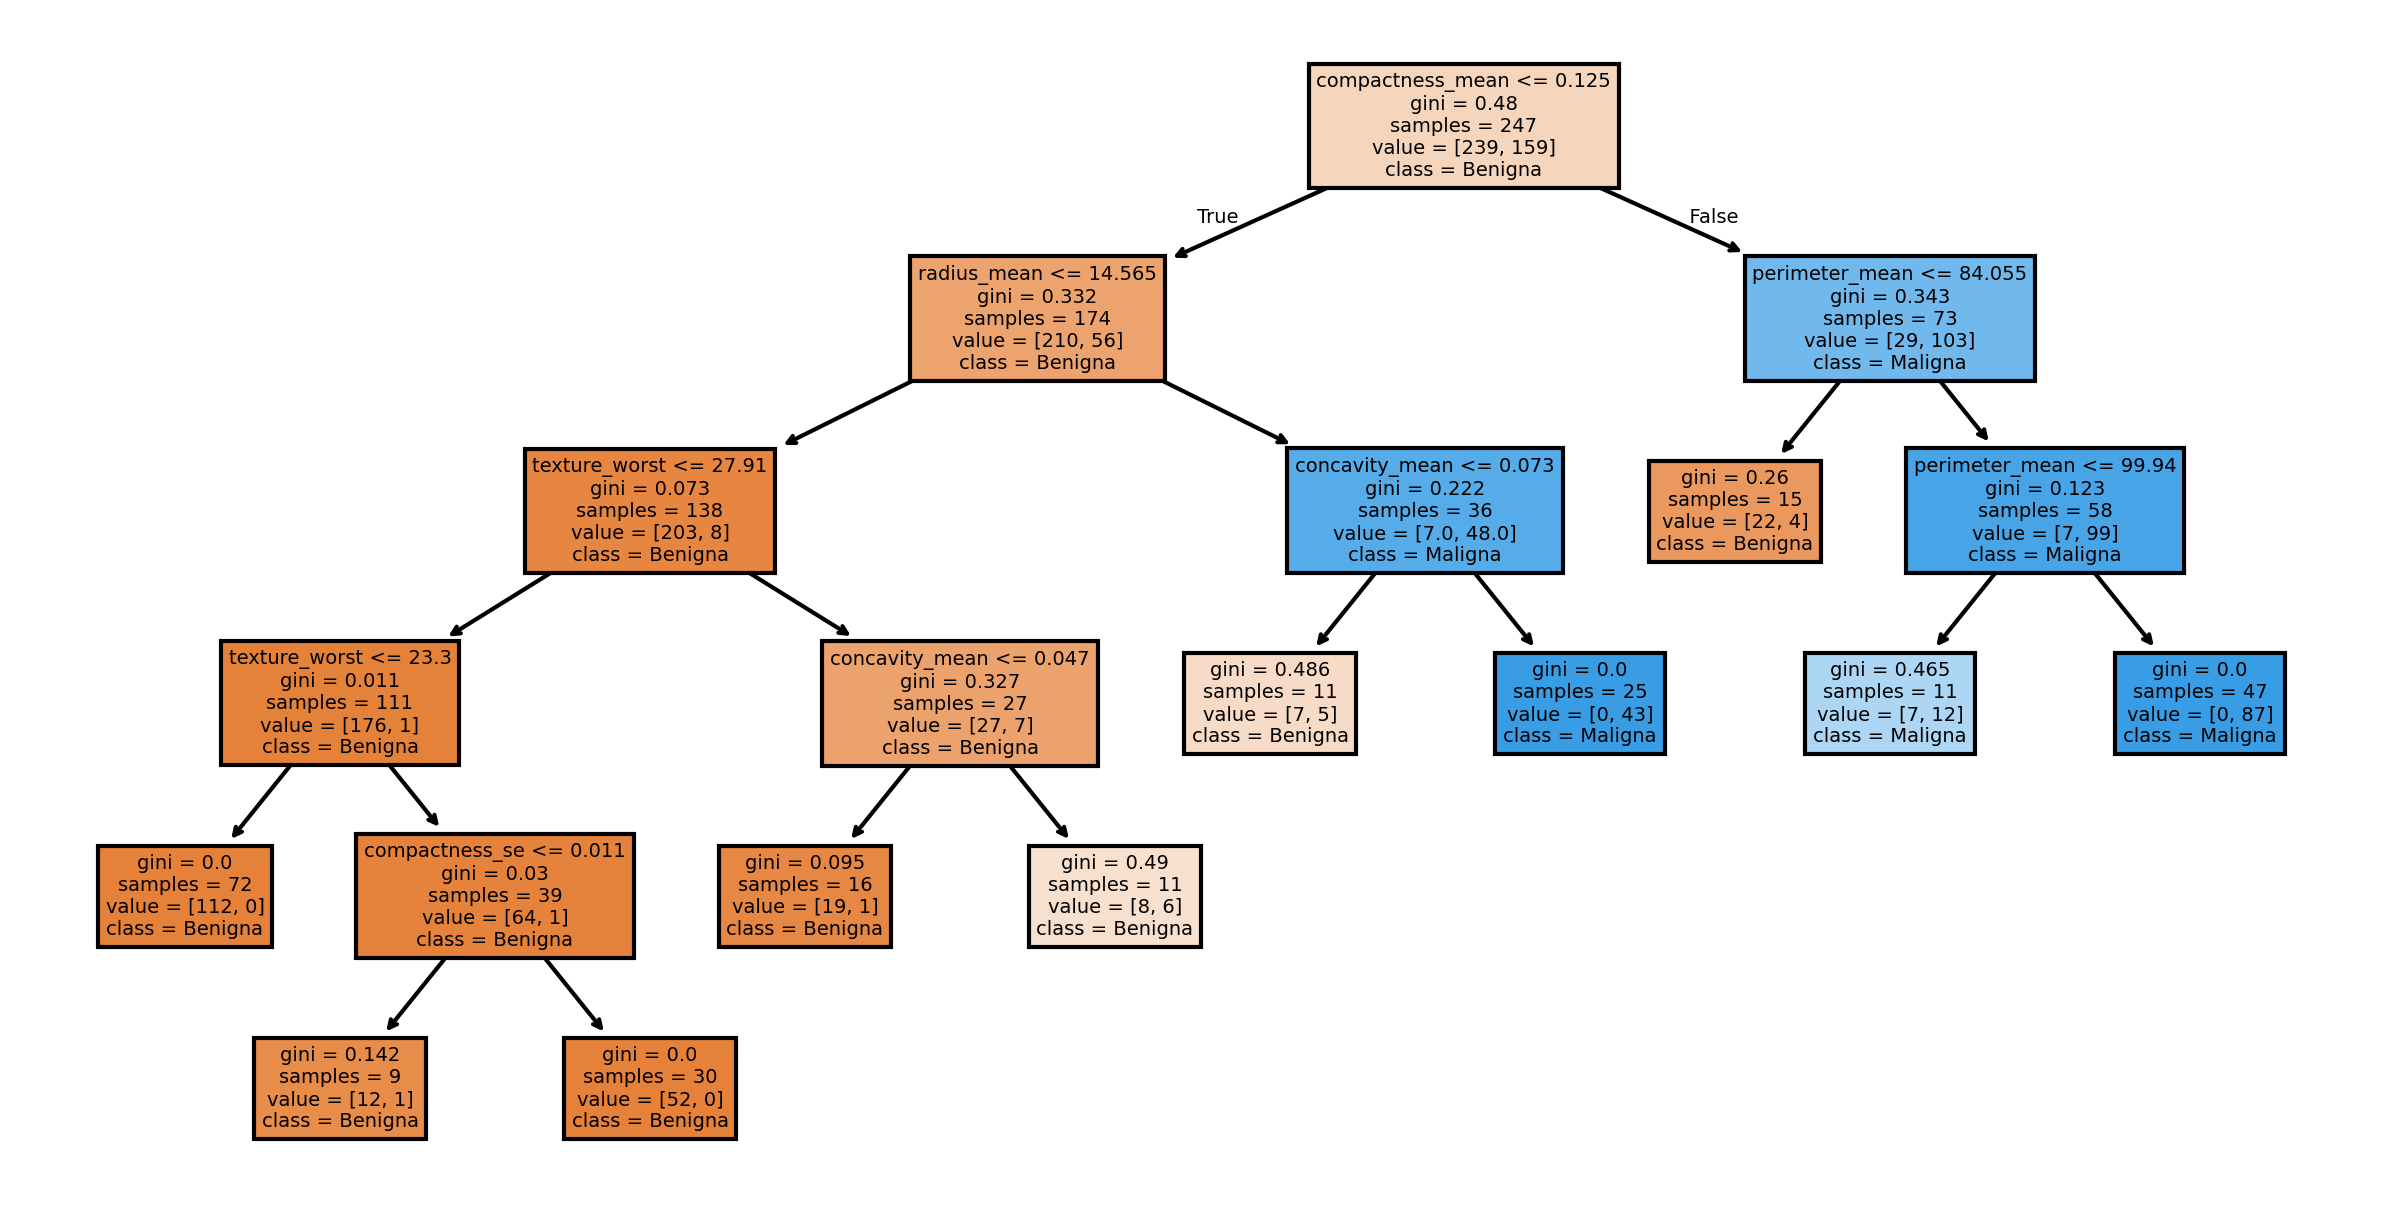

'\n#Temporário para ficar nas configurações da primeira Apresentação.\n\nimport time\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score, confusion_matrix\nfrom sklearn.tree import plot_tree\n\n# Definindo o número de árvores e outros parâmetros\nne = 100\nmin_samples_leaf = 9\nmax_features = "log2"\n\narvores = RandomForestClassifier(\n                n_estimators=ne,\n                min_samples_leaf=min_samples_leaf,\n                max_features=max_features,\n                random_state=42,\n                n_jobs=-1\n            )\n\n# Treinando o algoritmo\ninicio = time.time()\narvores.fit(X_train, y_train)\nfim = time.time()\n\n# Fazendo previsões\nprevisoes = arvores.predict(X_test)\n\n# Calculando a acurácia\nacuracia = accuracy_score(y_test, previsoes)\n\n# Mostrando os resultados\nprint(f\'Acurácia do modelo com {ne} árvores: {acuracia}\')\nprint(f\'Tempo de treino do modelo

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

# Definindo o número de árvores
ne = 100
min_samples_leaf = 9
max_features = "log2"

arvores = RandomForestClassifier(
                n_estimators=ne,
                min_samples_leaf=min_samples_leaf,
                max_features=max_features,
                random_state=42,
                n_jobs=-1
            )

# Treinando o algoritmo
inicio = time.time()
arvores.fit(X_train, y_train)
fim = time.time()

# Fazendo previsões
previsoes = arvores.predict(X_test)

# Calculando a acurácia
acuracia = accuracy_score(y_test, previsoes)

# Mostrando os resultados
print(f'Acurácia do modelo com {ne} árvores: {acuracia}')
print(f'Tempo de treino do modelo {ne}:', fim - inicio)

# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, previsoes)

# Exibindo a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=arvores.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()



# Exibindo uma árvore individual
best_tree = arvores.estimators_[3]  # Escolhendo a 'n-ésima' árvore

# Visualizando a árvore
plt.figure(figsize=(10, 5), dpi=300)
plot_tree(best_tree, filled=True, feature_names=X_train.columns, class_names=['Benigna', 'Maligna'])
plt.show()

'''
#Temporário para ficar nas configurações da primeira Apresentação.

import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

# Definindo o número de árvores e outros parâmetros
ne = 100
min_samples_leaf = 9
max_features = "log2"

arvores = RandomForestClassifier(
                n_estimators=ne,
                min_samples_leaf=min_samples_leaf,
                max_features=max_features,
                random_state=42,
                n_jobs=-1
            )

# Treinando o algoritmo
inicio = time.time()
arvores.fit(X_train, y_train)
fim = time.time()

# Fazendo previsões
previsoes = arvores.predict(X_test)

# Calculando a acurácia
acuracia = accuracy_score(y_test, previsoes)

# Mostrando os resultados
print(f'Acurácia do modelo com {ne} árvores: {acuracia}')
print(f'Tempo de treino do modelo {ne}:', fim - inicio)

# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, previsoes)

# Criando o DataFrame com a matriz de confusão e rótulos personalizados
df_conf_matrix = pd.DataFrame(
    conf_matrix,
    columns=['Predito Benigno', 'Predito Maligno'],
    index=['Real Benigno', 'Real Maligno']
)

# Estilizando a matriz de confusão com um gradiente de cor
styled_conf_matrix = df_conf_matrix.style.background_gradient(cmap='Blues')

# Mostrar a tabela estilizada (apenas em notebooks)
styled_conf_matrix
'''



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Acurácia:", accuracy_score(y_test, previsoes))
print("\nRelatório de Classificação:\n", classification_report(y_test, previsoes, digits=4))



Acurácia: 0.9766081871345029

Relatório de Classificação:
               precision    recall  f1-score   support

           B     0.9727    0.9907    0.9817       108
           M     0.9836    0.9524    0.9677        63

    accuracy                         0.9766       171
   macro avg     0.9782    0.9716    0.9747       171
weighted avg     0.9767    0.9766    0.9765       171



### Medição dos dados

**Avaliação para Modelos de Classificação**

Se o seu modelo é um classificador (como uma Árvore de Decisão ou Regressão Logística), você pode usar as seguintes métricas:

**Métricas e Como Calcular**
1. Acurácia: Proporção de previsões corretas.
2. Matriz de Confusão: Mostra como as previsões se dividem entre verdadeiros e falsos positivos/negativos.
3. Precision, Recall e F1-Score:
* **Precision**: Fração de positivos previstos corretamente.
* **Recall**: Fração de verdadeiros positivos encontrados.
* **F1-Score**: Média harmônica entre Precision e Recal


# Resultados e discussões

<p style='text-align: justify;'>
Os resultados obtidos após a aplicação das diferentes hipóteses e ajustes de parâmetros demonstraram variações significativas nas métricas de desempenho. Com 30% dos dados sendo  destinados para o teste, fizemos  todos os testes subsequentes. Inicialmente com os dados “crus” as métricas de precisão, recall, f1-score na classe Maligna e acurácia  foram de 96,72%, 93,65%, 95,16% e 96,49%, respectivamente. Esses resultados serviram como base de comparação para as etapas seguintes.
</p>

<p style='text-align: justify;'>
Após implementar a hipótese de redução de dimensionalidade, as métricas apresentaram uma melhora, com precisão atingindo 97%, recall  95%, f1-score 96% e acurácia 97%. Esse aumento reforça a justificativa de exclusão das variáveis com alta correlação, otimizando o modelo sem perda de informações relevantes.
</p>

In [ ]:
'''
import pandas as pd
from sklearn.metrics import confusion_matrix
from IPython.display import display

# Supondo que você já tem y_test e y_pred
matrix = confusion_matrix(y_test, y_pred)

# Criar DataFrame da matriz de confusão
df_cm = pd.DataFrame(
    matrix,
    columns=["Predito Benigno +", "Predito Maligno -"],
    index=["Real Benigno +", "Real Maligno -"]
)

# Função para estilizar a diagonal e uma célula específica (falsos negativos)
def highlight_diagonal_and_specific(data):
    styles = pd.DataFrame('', index=data.index, columns=data.columns)  # Matriz vazia de estilos

    # Pintar a diagonal de azul
    for i in range(len(data)):
        styles.iloc[i, i] = 'background-color: blue; color: white;'  # Diagonal azul

    # Pintar a célula (linha 1, coluna 0) de vermelho (falsos negativos)
    styles.iloc[1, 0] = 'background-color: red; color: white;'

    return styles

# Aplicar o estilo usando apply com axis=None
styled_df = df_cm.style.apply(highlight_diagonal_and_specific, axis=None)

# Exibir o DataFrame estilizado
display(styled_df)
'''

'\nimport pandas as pd\nfrom sklearn.metrics import confusion_matrix\nfrom IPython.display import display\n\n# Supondo que você já tem y_test e y_pred\nmatrix = confusion_matrix(y_test, y_pred)\n\n# Criar DataFrame da matriz de confusão\ndf_cm = pd.DataFrame(\n    matrix,\n    columns=["Predito Benigno +", "Predito Maligno -"],\n    index=["Real Benigno +", "Real Maligno -"]\n)\n\n# Função para estilizar a diagonal e uma célula específica (falsos negativos)\ndef highlight_diagonal_and_specific(data):\n    styles = pd.DataFrame(\'\', index=data.index, columns=data.columns)  # Matriz vazia de estilos\n\n    # Pintar a diagonal de azul\n    for i in range(len(data)):\n        styles.iloc[i, i] = \'background-color: blue; color: white;\'  # Diagonal azul\n\n    # Pintar a célula (linha 1, coluna 0) de vermelho (falsos negativos)\n    styles.iloc[1, 0] = \'background-color: red; color: white;\'\n\n    return styles\n\n# Aplicar o estilo usando apply com axis=None\nstyled_df = df_cm.style.ap

In [ ]:
# Relatório de Classificação (Precision, Recall e F1-Score)
#print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

In [ ]:
'''
# Curva ROC e AUC
# Supondo que você já tenha o y_test (rótulos reais) e y_pred (previsões)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc:.2f}")

# Plotar Curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
'''

'\n# Curva ROC e AUC\n# Supondo que você já tenha o y_test (rótulos reais) e y_pred (previsões)\n\n\nfpr, tpr, thresholds = roc_curve(y_test, y_pred)\nauc = roc_auc_score(y_test, y_pred)\nprint(f"AUC-ROC: {auc:.2f}")\n\n# Plotar Curva ROC\nplt.figure()\nplt.plot(fpr, tpr, label=f\'AUC = {auc:.2f}\')\nplt.plot([0, 1], [0, 1], linestyle=\'--\', color=\'gray\')  # Linha diagonal\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Curva ROC\')\nplt.legend(loc=\'lower right\')\nplt.show()\n'

# Conclusão

<p style='text-align: justify;'>
O estudo confirmou a eficácia de abordagens específicas para otimizar a precisão e robustez do modelo de classificação. A hipótese de redução de dimensionalidade, aplicada por meio da exclusão de variáveis altamente correlacionadas, mostrou-se particularmente vantajosa, resultando em melhorias nas principais métricas, como precisão (97%), recall (95%), f1-score (96%) e acurácia (97%). Esses resultados indicam que a simplificação do conjunto de variáveis pode ser uma estratégia eficaz para evitar redundâncias e melhorar o desempenho do modelo.
</p>
<p style='text-align: justify;'>
A remoção de outliers baseada na métrica de Mahalanobis também foi testada, mas seu impacto foi ruim para o aumento das métricas de interesse. De forma semelhante, a normalização dos dados apresentou um efeito neutro sobre a acurácia e as demais métricas.
Ao variar a proporção do conjunto de teste, observou-se que a divisão de 30% dos dados para teste e o uso do critério de entropia representaram a configuração ideal para maximizar o desempenho. Com essa combinação, o modelo atingiu métricas superiores em comparação com a configuração inicial, validando a eficácia da redução de dimensionalidade na preparação dos dados para o modelo.
</p>
<p style='text-align: justify;'>
Em resumo, os resultados do estudo reforçam que a simplificação cuidadosa das variáveis pode ser essencial para otimizar modelos de classificação, ao passo que a remoção de outliers e a normalização nem sempre são beneficiais consistentes. Esses insights fornecem uma base sólida para estudos futuros, especialmente para aprimorar modelos preditivos em cenários onde a correlação entre variáveis é significativa.
</p>
